# 회귀 실습 - 자전거 대여 수요 예측

- Kaggle Bike Sharing Demand 예측 경연 대회
- https://www.kaggle.com/c/bike-sharing-demand/data
- 2011.01~2012.12 날짜/시간(1시간 간격), 기온 습도, 풍속, 자전거 대여 횟수

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

### 데이터 탐색

In [105]:
bike_df = pd.read_csv('./datasets/bike_train.csv')
bike_df.shape

(10886, 12)

In [106]:
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [107]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [108]:
# datetime - hourly date + timestamp  
# season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
# holiday - whether the day is considered a holiday
# workingday - whether the day is neither a weekend nor holiday
# weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
# temp - temperature in Celsius
# atemp - "feels like" temperature in Celsius
# humidity - relative humidity
# windspeed - wind speed
# casual - number of non-registered user rentals initiated
# registered - number of registered user rentals initiated
# count - number of total rentals

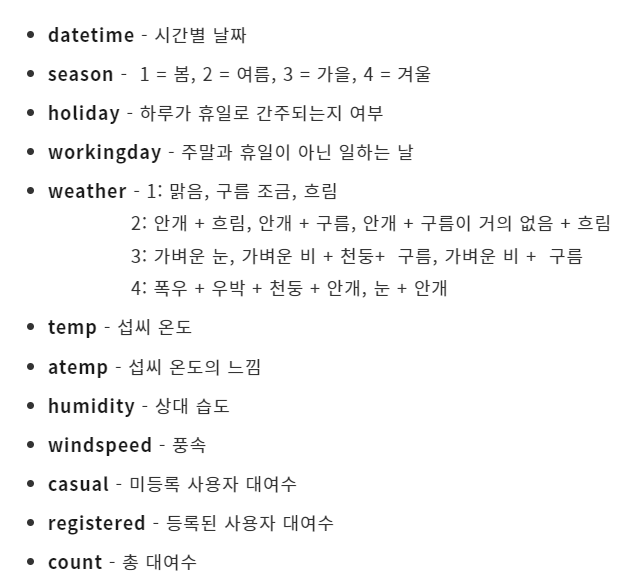

### 데이터 클렌징 및 가공

**datetime 컬럼을 datetime 타입으로 변경하고 년,월,일,시 컬럼으로 추출**

In [109]:
# 문자열을 datetime 타입으로 변경. 
bike_df['datetime'] = bike_df['datetime'].apply(pd.to_datetime)
bike_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [110]:
# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year']= bike_df.datetime.apply(lambda x:x.year)
bike_df['month']=bike_df.datetime.apply(lambda x:x.month)
bike_df['day']=bike_df.datetime.apply(lambda x:x.day)
bike_df['hour']=bike_df.datetime.apply(lambda x:x.hour)
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [111]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

**피처 삭제**
- 상관성이 있는 컬럼들 삭제 : 'datetime','casual','registered'

In [112]:
drop_columns = ['datetime' , 'casual' , 'registered'] #casual + registered=count 이기 때문에
bike_df.drop(drop_columns , axis=1, inplace=True)
bike_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


**회귀모델 성능평가 함수 작성**

In [113]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 캐글 해당 문제에서 요구한 성능 평가 방법은 RMSLE(Root Mean Square Log Error) -> 오류 값의 로그에 대한 RMSE
# log 값 변환 시 NaN등의 이슈로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y, pred))

# MAE , MSE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae = mean_absolute_error(y, pred)
    mse = mean_squared_error(y, pred)
    print('RMSLE : {0:.3f} , RMSE : {1:.3f} ,MAE : {2:.3f} , MSE : {3:.3f}'.format(rmsle_val, rmse_val, mae, mse))

### (1) 피처 클렌징 후 선형회귀 모델 학습/예측/평가

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
y = bike_df['count']
X = bike_df.drop('count' , axis=1, inplace=False)

X_train, X_test , y_train , y_test = train_test_split(X, y , random_state=0, test_size=0.3)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

RMSLE : 1.165 , RMSE : 140.900 ,MAE : 105.924 , MSE : 19852.694


In [115]:
bike_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132,2011.501929,6.521495,9.992559,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454,0.500019,3.444373,5.476608,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000,2011.000000,4.000000,5.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000,2012.000000,7.000000,10.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000,2012.000000,10.000000,15.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000,2012.000000,12.000000,19.000000,23.000000


In [116]:
bike_df.season.value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

**실제 대여횟수와 예측 대여횟수 비교**

In [117]:
def get_top_error_data(y_test, pred, n_tops = 5):
    result_df = pd.DataFrame(y_test.values , columns=['Actual_count'])
    result_df['Predicted_count'] = np.round(pred, 1)
    result_df['Diff'] = result_df['Actual_count']-result_df['Predicted_count']
    print(result_df.sort_values('Diff' , ascending=False)[:n_tops])#내림차순 ~ n_top까지

In [118]:
get_top_error_data(y_test, pred)

      Actual_count  Predicted_count   Diff
1618           890            322.1  567.9
966            884            326.7  557.3
3151           798            241.4  556.6
412            745            193.9  551.1
2277           813            267.0  546.0


### (2) 타깃 변수 로그 변환 후 모델 학습/예측/평가

<AxesSubplot:>

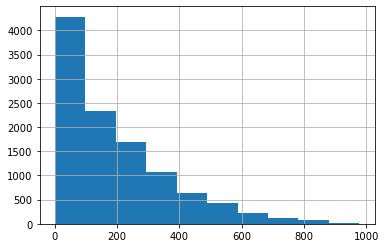

In [119]:
y.hist()

**타깃변수 로그변환**

<AxesSubplot:>

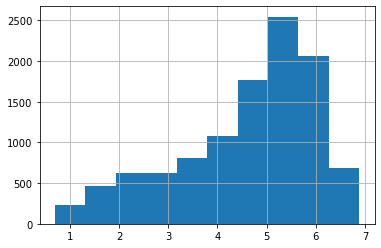

In [120]:
y_log = np.log1p(y)
y_log.hist()

**타깃 변수 로그변환 후 선형회귀 모델 학습/예측/평가(2)**

In [123]:
# 타겟 컬럼인 count 값을 log1p 로 Log 변환

y = np.log1p(y)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test , y_train, y_test = train_test_split(X , y , random_state=0, test_size=0.3)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타겟 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale 변환
pred_exp = np.expm1(pred)
evaluate_regr(y_test_exp, pred_exp)

# log 변환해서 학습한 모델의 성능이 더 좋다


RMSLE : 0.233 , RMSE : 1.070 ,MAE : 0.862 , MSE : 1.145


In [124]:
# 원자료
# RMSLE : 1.165 , RMSE : 140.900 ,MAE : 105.924 , MSE : 19852.694

**회귀계수 시각화**

<AxesSubplot:>

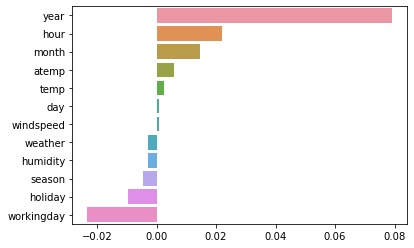

In [125]:
coef = pd.Series(lr_reg.coef_ , index=X.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort , y=coef_sort.index)

### (3) 피처 인코딩 후 모델 학습/예측/평가

**'year', month', 'day', hour' 피처 원-핫 인코딩**

In [126]:
X_ohe = pd.get_dummies(X, columns=['year' , 'month' , 'day' , 'hour' , 'holiday' , 'workingday' , 'season' , 'weather' ])

In [127]:
X_ohe.shape

(10886, 73)

**원-핫 인코딩 적용된 피처 데이터 기반으로 학습/예측/평가**

In [128]:
# 학습/예측 데이터 분할 
X_train , X_test, y_train, y_test = train_test_split(X_ohe , y, random_state=0 , test_size=0.3)

lr_reg = LinearRegression()

In [129]:
# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1: #true일경우(log 변환했을 경우 -> 다시 변환해줘야 한다)
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('##' , model.__class__.__name__, '##')
    evaluate_regr(y_test, pred)

In [130]:
from sklearn.linear_model import Ridge, Lasso

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg , ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test , y_train, y_test , is_expm1=True)


## LinearRegression ##
RMSLE : 0.143 , RMSE : 0.612 ,MAE : 0.465 , MSE : 0.374
## Ridge ##
RMSLE : 0.143 , RMSE : 0.610 ,MAE : 0.466 , MSE : 0.372
## Lasso ##
RMSLE : 0.213 , RMSE : 0.959 ,MAE : 0.774 , MSE : 0.919


**회귀계수 시각화**

<AxesSubplot:>

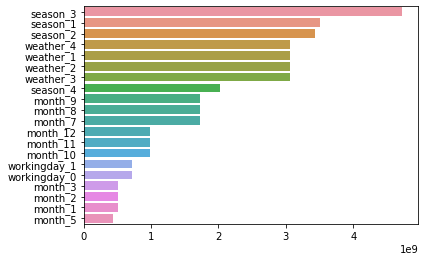

In [131]:
coef = pd.Series(lr_reg.coef_ , index=X_ohe.columns)
coef_sort = np.abs(coef).sort_values(ascending=False)[:20]
sns.barplot(x=(coef_sort) , y=coef_sort.index)

### 회귀트리를 이용한 예측

In [70]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력 될 경우 버전에 따라 오류 발생 가능
    # ndarray로 변환
    get_model_predict(model, X_train.values , X_test.values , y_train.values, y_test.values , is_expm1=True)

# 처음 값
# RMSLE : 1.165 , RMSE : 140.900 ,MAE : 105.924 , MSE : 19852.694

## RandomForestRegressor ##
RMSLE : 0.355 , RMSE : 50.293 ,MAE : 31.134 , MSE : 2529.412
## GradientBoostingRegressor ##
RMSLE : 0.330 , RMSE : 53.319 ,MAE : 32.730 , MSE : 2842.919
## XGBRegressor ##
RMSLE : 0.342 , RMSE : 51.732 ,MAE : 31.251 , MSE : 2676.157
## LGBMRegressor ##
RMSLE : 0.319 , RMSE : 47.215 ,MAE : 29.029 , MSE : 2229.223
